In [29]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [30]:
model = tf.keras.models.load_model('trained_model.keras')

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

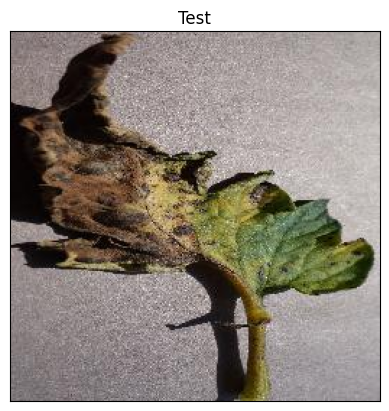

In [32]:
import cv2
img_path = "test/test/TomatoEarlyBlight1.jpg"
#image read
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  #convert color

plt.imshow(img)
plt.title("Test")
plt.xticks([])
plt.yticks([]) #remove axis
plt.show()

In [33]:
#testing

In [34]:
image = tf.keras.preprocessing.image.load_img(img_path,target_size = (128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
print(input_arr.shape)

(1, 128, 128, 3)


In [35]:
prediction = model.predict(input_arr)
prediction , prediction.shape

1/1 [==============================] - 0s 126ms/step


(array([[3.2018130e-07, 3.8438156e-06, 6.1122386e-04, 9.7323264e-06,
         1.6855176e-07, 9.6989988e-06, 5.4009087e-07, 1.9820403e-05,
         2.2239169e-06, 3.4951406e-06, 2.0880263e-07, 1.1282582e-05,
         2.7842280e-03, 1.5036437e-05, 6.5127729e-08, 7.9252843e-08,
         4.4803962e-04, 8.7319466e-05, 4.2022566e-06, 2.0916597e-05,
         8.2477454e-06, 1.1410053e-06, 1.6045487e-06, 3.9551554e-07,
         4.5573211e-07, 1.4856671e-06, 1.1473857e-03, 1.0623666e-07,
         6.7822307e-06, 9.5250428e-01, 7.4521601e-03, 1.6624257e-05,
         2.1691364e-03, 2.1339963e-05, 5.4772150e-05, 1.0884455e-06,
         3.2544591e-02, 3.5954279e-05]], dtype=float32),
 (1, 38))

In [36]:
result_index = np.argmax(prediction)
result_index

29

In [37]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

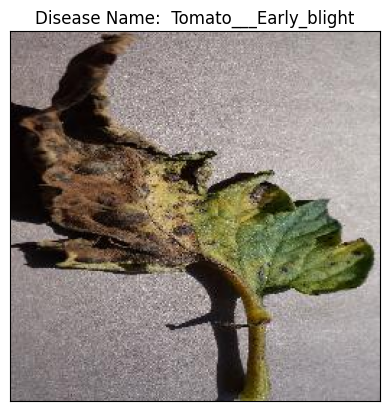

In [38]:
model_prediction = class_name[result_index]  # Use [] to access the element by index
plt.imshow(img)
plt.title(f"Disease Name:  {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()
